# Analysis Development

This notebook seeks to develop extended analyses for the IFAC style blending. Specifically, I am interested in assistance percentage of overall control input.

The datasets recorded on 04/10/17 are performed by Mitchell. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import exc_analysis.plotting as exc_plt
from exc_analysis import preprocess

In [8]:
reload(exc_plt)

<module 'exc_analysis.plotting' from '/Users/mitchallain/Development/Python/exc_analysis/exc_analysis/plotting.py'>

In [3]:
ls data/

blended_0410_1640.csv        yalen_blended_0413_1300.csv
manual_0410_1635.csv


In [4]:
labels = ['Boom', 'Stick', 'Bucket', 'Swing']

In [5]:
manual = pd.read_csv('data/manual_0410_1635.csv')
manual.head()

,Time,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms
0,0.002691,7.4745,6.9645,7.614,7.4695,10.408889,8.198438,4.293077,0.0
1,0.069230,7.4745,6.9645,7.614,7.4695,10.408889,8.165000,4.293077,0.0
2,0.119258,7.4745,6.9645,7.614,7.4695,10.408889,8.198438,4.293077,0.0
3,0.200469,7.4745,6.9645,7.614,7.4695,10.372778,8.198438,4.293077,0.0
4,0.275061,7.4745,6.9645,7.614,7.4695,10.372778,8.198438,4.293077,0.0


In [6]:
blended = pd.read_csv('data/yalen_blended_0413_1300.csv')
blended = preprocess.preprocess_blended(blended)
blended.head()

,Time,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ctrl,Stick Ctrl,Bucket Ctrl,Swing Ctrl,Boom Blended,Stick Blended,Bucket Blended,Swing Blended,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Class,Confidence,Unnamed: 19
0,0.007961,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,7.4745,6.9645,7.614,7.4695,10.625556,9.4144,2.993915,0.0,0,False,NaN
1,0.082345,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,7.4745,6.9645,7.614,7.4695,10.625556,9.4144,2.993915,0.0,0,False,NaN
2,0.183665,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,7.4745,6.9645,7.614,7.4695,10.661667,9.4144,2.973468,0.0,0,False,NaN
3,0.297645,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,7.4745,6.9645,7.614,7.4695,10.625556,9.4144,2.973468,0.0,0,False,NaN
4,0.424010,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,7.4745,6.9645,7.614,7.4695,10.625556,9.4144,2.993915,0.0,0,False,NaN


In [10]:
blended.shape

(10168, 20)

In [11]:
# Trim to time interval
blended_trim = blended[3000:4000]
blended_trim.head()

,Time,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ctrl,Stick Ctrl,Bucket Ctrl,Swing Ctrl,Boom Blended,Stick Blended,Bucket Blended,Swing Blended,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Class,Confidence,Unnamed: 19
3000,152.915310,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,7.4745,6.9645,7.614,7.4695,10.481111,7.598,2.013063,1.178097,0,False,NaN
3001,152.963994,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,7.4745,6.9645,7.614,7.4695,10.445000,7.566,1.994625,1.178097,0,False,NaN
3002,153.011731,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,7.4745,6.9645,7.614,7.4695,10.481111,7.598,2.013063,1.178097,0,False,NaN
3003,153.068473,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,7.4745,6.9645,7.614,7.4695,10.481111,7.598,2.031500,1.178097,0,False,NaN
3004,153.125160,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,7.4745,6.9645,7.614,7.4695,10.445000,7.566,1.994625,1.178097,0,False,NaN


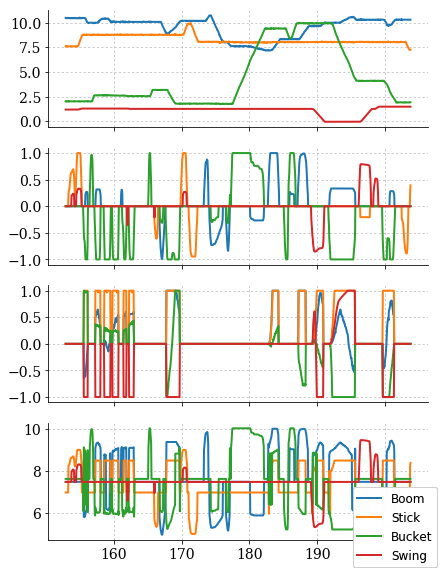

In [12]:
exc_plt.view_trial(blended_trim, trial_type='blended')

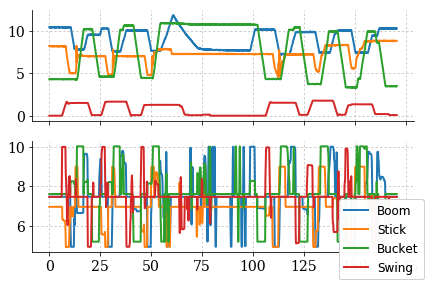

In [9]:
exc_plt.view_trial(manual, trial_type='manual')

In [13]:
# Gotta fix the cmd and blended to support stacked plot
Y = blended_trim['Boom Cmd'] - 0.5*blended_trim['Boom Cmd']*blended_trim['Confidence'] + blended_trim['Boom Ctrl'] * 0.5
blended_new = blended_trim[['Time'] +
                      [lbl + ' Blended' for lbl in labels] +
                      [lbl + ' Cmd' for lbl in labels]].copy()
blended_new.head()

for i in range(4):
    blended_new[labels[i] + ' Blended'] = blended_trim[labels[i] + ' Cmd'] - 0.5*blended_trim[labels[i] + ' Cmd']*blended_trim['Confidence'] + blended_trim[labels[i] + ' Ctrl'] * 0.5
    blended_new[labels[i] + ' Cmd'] = blended_trim[labels[i] + ' Cmd'] - 0.5*blended_trim[labels[i] + ' Cmd']*blended_trim['Confidence']
blended_new

,Time,Boom Blended,Stick Blended,Bucket Blended,Swing Blended,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd
3000,152.915310,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3001,152.963994,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3002,153.011731,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3003,153.068473,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3004,153.125160,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3005,153.172910,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3006,153.218463,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3007,153.273489,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3008,153.326016,0.0,0.233185,0.0,0.000000,0.0,0.233185,0.0,0.000000
3009,153.378610,0.0,0.281769,0.0,0.000000,0.0,0.281769,0.0,0.000000


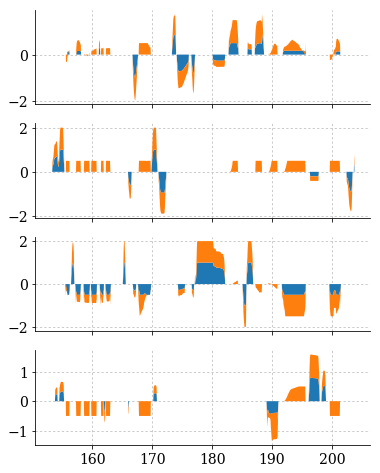

In [14]:
exc_plt.view_assistance_magnitude(blended_new)